<a href="https://colab.research.google.com/github/KennethJiang1213/NYU_Integrated_Marketing/blob/main/%E2%80%9CA%20Multi%20FactorTest%20of%20Apple's_Stock%20Price%E2%80%9DKenneth%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/KennethJiang1213/NYU_Integrated_Marketing/main/AAPL.O.csv')
df=df.dropna()
df.head()

,Date,Close,PE(TTM),PB(MRQ),PS(TTM)
0,2006/1/1,2.214860,45.383213,8.115000,4.349048
1,2006/1/2,2.214860,45.383213,8.115000,4.349048
2,2006/1/3,2.302974,47.188694,8.437839,4.522066
3,2006/1/4,2.309752,47.327576,8.462673,4.535375
4,2006/1/5,2.291574,46.955116,8.396073,4.499683


In [ ]:
df.columns

Index(['Date', 'Close', 'PE(TTM)', 'PB(MRQ)', 'PS(TTM)'], dtype='object')

# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

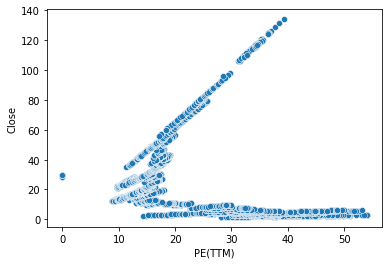

In [ ]:
x='PE(TTM)'
y='Close'
sns.scatterplot(data=df, x=x, y=y)

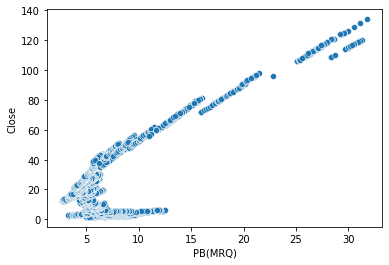

In [ ]:
x='PB(MRQ)'
y='Close'
sns.scatterplot(data=df, x=x, y=y)

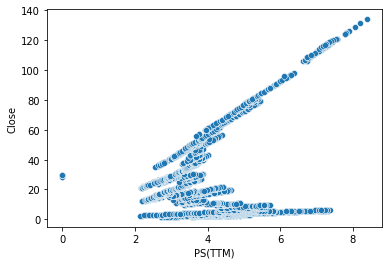

In [ ]:
x='PS(TTM)'
y='Close'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445 entries, 0 to 5444
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     5445 non-null   object 
 1   Close    5445 non-null   float64
 2   PE(TTM)  5445 non-null   float64
 3   PB(MRQ)  5445 non-null   float64
 4   PS(TTM)  5445 non-null   float64
dtypes: float64(4), object(1)
memory usage: 255.2+ KB


In [ ]:
# define the dependent and independent variables
X=df[['PE(TTM)','PB(MRQ)','PS(TTM)']]
y=df['Close']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,PE(TTM),PB(MRQ),PS(TTM)
0,1.0,45.383213,8.115000,4.349048
1,1.0,45.383213,8.115000,4.349048
2,1.0,47.188694,8.437839,4.522066
3,1.0,47.327576,8.462673,4.535375
4,1.0,46.955116,8.396073,4.499683


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.658e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:57:26   Log-Likelihood:                -18609.
No. Observations:                5445   AIC:                         3.723e+04
Df Residuals:                    5441   BIC:                         3.725e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0032      0.410     46.327      0.0

### Check assumptions

In [ ]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,5.721852,-3.506992
1,5.721852,-3.506992
2,6.705491,-4.402518
3,6.781154,-4.471402
4,6.578235,-4.286661


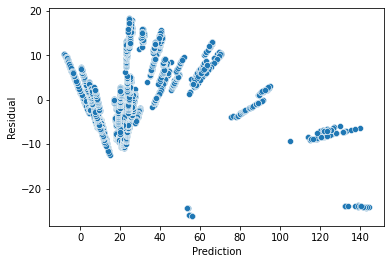

In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

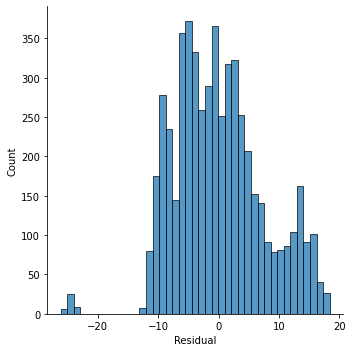

In [ ]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [ ]:
x=df_res['Residual']
pg.normality(x)

NameError: ignored

In [ ]:
pg.pairwise_corr(df,columns=['PE(TTM)','PS(TTM)'], method='pearson').round(3)

In [ ]:
pg.pairwise_corr(df,columns=['PE(TTM)','PB(MRQ))'], method='pearson').round(3)

In [ ]:
pg.pairwise_corr(df,columns=['PB(MRQ)','PS(TTM)'], method='pearson').round(3)